<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/main/Jupiter%20Notebooks/Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Mining

This Notebook takes the merged service requests and creates association rules on the data

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
!pip install apyori
from apyori import apriori
import random
%matplotlib inline
plt.style.use('ggplot')

# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [2]:
#import the association rule packages
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

In [3]:
# Read in the merged, preprocessed data
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
requests = read_data_from_URL(serv_req_url)
requests.head()

,Unnamed: 0,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,...,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENT HOUSEHOLD INCOME_Retired Householders,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,0.210336,0.157483,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN
1,1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:00:00,11,2016,4,...,0.084375,0.129942,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN
2,2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,0.037530,0.113167,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN
3,3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:00:00,11,2016,4,...,0.053345,0.128969,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN
4,4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:00:00,11,2016,4,...,0.050732,0.097692,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y


In [4]:
#list all column names
requests.columns.values

array(['Unnamed: 0', 'OBJECTID', 'DEPARTMENT', 'REQUEST_NO',
       'REQUEST_CAT', 'REQUEST_TYPE', 'RECEIVED_DATE', 'RECEIVED_MONTH',
       'RECEIVED_YEAR', 'SEASON', 'INTERNAL_FIELD_OBSERVATION',
       'NEIGHBORHOOD_PROFILE_AREA', 'BLOCK_NO', 'ZIP_CODE', 'X_COORD',
       'Y_COORD', 'LATITUDE', 'LONGITUDE', 'RECEIVED_DAY', 'TOTAL_CALLS',
       'ADDRESS_ID', 'CRIME_SCORE', 'EMPLOYED_All',
       'PERCENT EMPLOYED_In labor force',
       'PERCENT EMPLOYED_Not in labor force',
       'PERCENT EMPLOYED_Female Only', 'COMMUTING TO WORK_All',
       'PERCENT COMMUTING TO WORK_By Car',
       'PERCENT COMMUTING TO WORK_Public transportation',
       'PERCENT COMMUTING TO WORK_Walk',
       'PERCENT COMMUTING TO WORK_Other',
       'PERCENT COMMUTING TO WORK_Worked at home',
       'INCOME AND BENEFITS_Total households',
       'PERCENT HOUSEHOLD INCOME_Lower Income Households',
       'PERCENT HOUSEHOLD INCOME_Mid Income Households',
       'PERCENT HOUSEHOLD INCOME_Higher Income Househol

In [5]:
#function to calculate if the income bracket is predominantly low, mid or high
def calculate_income_bracket(low,mid,high):
    if low>mid and low>high:
        return 'Low'
    elif mid>high:
        return 'Mid'
    else:
        return 'High'

In [6]:
requests['PREDOMINANT_INCOME_BRACKET']=requests[['PERCENT HOUSEHOLD INCOME_Lower Income Households','PERCENT HOUSEHOLD INCOME_Mid Income Households','PERCENT HOUSEHOLD INCOME_Higher Income Households']].apply(lambda x: calculate_income_bracket(*x),axis=1)


In [7]:
requests['PREDOMINANT_INCOME_BRACKET'].value_counts()

Mid     1491811
Low       29346
High       2904
Name: PREDOMINANT_INCOME_BRACKET, dtype: int64

In [8]:
requests['CRIME_SCORE']=requests['CRIME_SCORE'].apply(lambda x: round(x,3))
requests['NEIGHBORHOOD_PROFILE_AREA']=requests['NEIGHBORHOOD_PROFILE_AREA'].apply(lambda x: str(int(x)))

In [9]:
max_crime_score=requests['CRIME_SCORE'].max()
requests['CRIME_INDEX']=requests['CRIME_SCORE'].apply(lambda x: 'Low' if (x/max_crime_score)<=0.33 else ('Mid' if (x/max_crime_score)<=0.66 else 'High'))

In [10]:
requests.head()

,Unnamed: 0,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,...,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING,PREDOMINANT_INCOME_BRACKET,CRIME_INDEX
0,0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN,Mid,Low
1,1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:00:00,11,2016,4,...,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN,Mid,Low
2,2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN,Mid,Low
3,3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:00:00,11,2016,4,...,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN,Mid,Low
4,4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:00:00,11,2016,4,...,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y,Mid,Low


## Association rules between Request Categories and Neighborhood Profile Areas

In [11]:
requests['REQUEST_CAT'].value_counts()

NON_RECYCLABLE ITEMS         820199
RECYCLABLE ITEMS             196945
CART                         107771
HNS HEALTH AND SANITATION     77723
TRANSPORTATION                52467
MISSED SERVICE                43400
GARBAGE                       30604
311 DOCUMENT                  22379
RECYCLING                     22200
VIOLATIONS                    15821
YARD WASTE                    15796
TIRES                         13440
WEATHER AND ENVIRONMENTAL     11641
ZONING                        11410
DEAD ANIMAL COLLECTION        10701
ZONING/COMPLAINT/ INSPECT      9994
COMPLAINT                      8486
HNS HOUSING                    8161
BULKY ITEM                     8045
ZON GENERAL INFO  INQUIRY      7894
CUSTOMER FEEDBACK              6835
BLOCKAGE                       4462
CLEANLINESS                    3447
CWP                            2645
DISABILITY ACT                 2525
ADMINISTRATIVE ACTIONS         2326
ESCALATION REQUEST             1791
UTILITY VERIFICATION LTR    

In [12]:
#create a column to combine month, year and neighborhood profile area:
requests['MERGE_INDEX']=requests['RECEIVED_MONTH'].astype('str')+'_'+requests['RECEIVED_YEAR'].astype('str')+'_'+requests['NEIGHBORHOOD_PROFILE_AREA'].astype('str')
requests['REQ_COUNT']=1

In [13]:
requests.head()

,Unnamed: 0,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,...,INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING,PREDOMINANT_INCOME_BRACKET,CRIME_INDEX,MERGE_INDEX,REQ_COUNT
0,0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN,Mid,Low,11_2016_215,1
1,1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:00:00,11,2016,4,...,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN,Mid,Low,11_2016_265,1
2,2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,...,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN,Mid,Low,11_2016_103,1
3,3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:00:00,11,2016,4,...,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN,Mid,Low,11_2016_158,1
4,4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:00:00,11,2016,4,...,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y,Mid,Low,11_2016_88,1


In [14]:
#create a matrix of merge index and category with the values as sum of requests(number of requests of 
# a particular category raised per month of a year for a particular neighborhood profile area) 
request_basket = (requests
          .groupby(['MERGE_INDEX','REQUEST_CAT'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
request_basket.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_10,3.0,2.0,0.0,0.0,0.0,0.0,2.0,18.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0
10_2016_100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
10_2016_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10_2016_102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
10_2016_103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
10_2016_105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#check the min and max using describe
request_basket.describe()

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
count,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,...,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000,26271.000000
mean,0.851852,0.088539,0.003883,0.045487,0.169845,0.008565,0.306231,4.102280,0.131209,0.323018,...,0.014084,0.511591,1.997145,0.054851,0.602223,0.443112,0.601271,0.300483,0.434319,0.380419
std,1.191478,0.366885,0.071847,0.218714,0.464095,0.099690,0.670135,6.281683,0.409941,0.629465,...,0.205444,0.978805,2.664610,0.269497,1.459714,0.939404,1.241221,0.649909,0.842676,0.987129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,...,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,14.000000,8.000000,4.000000,4.000000,9.000000,3.000000,9.000000,114.000000,6.000000,7.000000,...,15.000000,15.000000,49.000000,6.000000,29.000000,30.000000,30.000000,6.000000,15.000000,55.000000


In [16]:
request_basket.columns

Index(['311 DOCUMENT', 'ADMINISTRATIVE ACTIONS', 'ADOPT-A PICKUP SWS',
       'ANIMAL FOUND REPORT', 'BLOCKAGE', 'BOARDED UP STRUCTURE', 'BULKY ITEM',
       'CART', 'CLEANLINESS', 'COMPLAINT', 'CONTENT IMPROVEMENT PROG',
       'CUSTOMER FEEDBACK', 'CWP', 'DEAD ANIMAL COLLECTION', 'DISABILITY ACT',
       'DISABLED SERVICE', 'ESCALATION REQUEST', 'FIELD OBSERVED PROBLEM',
       'GARBAGE', 'HNS HEALTH AND SANITATION', 'HNS HOUSING', 'MISSED SERVICE',
       'NON_RECYCLABLE ITEMS', 'PARK & REC SVC REQUEST', 'RECYCLABLE ITEMS',
       'RECYCLING', 'REQUEST FOR SPEAKER', 'STW CNTY WATER QUALITY',
       'STW OTHER', 'SW ONLY-DOOR HANGER LEFT', 'TIRES', 'TRANSPORTATION',
       'UTILITY VERIFICATION LTR', 'VIOLATIONS', 'WEATHER AND ENVIRONMENTAL',
       'YARD WASTE', 'ZON GENERAL INFO  INQUIRY', 'ZONING',
       'ZONING/COMPLAINT/ INSPECT'],
      dtype='object', name='REQUEST_CAT')

In [17]:
#function to encode the value of a cell as 1 if it is >=1 and as 0 if it is <=0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

    
#update the values in the request_basket_sets
request_basket_sets = request_basket.applymap(encode_units)

In [18]:
request_basket_sets.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_10,1,1,0,0,0,0,1,1,0,0,...,0,1,1,0,1,1,1,1,1,1
10_2016_100,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
10_2016_101,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
10_2016_102,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
10_2016_103,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10_2016_105,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10_2016_106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10_2016_107,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_108,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Association Rule Mining Definition:
Association rule mining, at a basic level, involves the use of machine learning models to analyze data for patterns, or co-occurrences in a database. It identifies frequent if-then associations, which themselves are the association rules.

An association rule has two parts: an antecedent (if) and a consequent (then). An antecedent is an item found within the data. A consequent is an item found in combination with the antecedent.

Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships.

### Association Rules concepts:
"Support" is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

"Confidence" is a measure of the reliability of the rule. A confidence of .5 in in an association rule X --> Y would mean that in 50% of the cases where X occurs, Y also occurs. Confidence that can be used as a threshold differs from industry to industry and case to case. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

"Lift" is the ratio of the observed support to that expected if the two rules were independent. The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

<img src="https://wiki.smu.edu.sg/1718t3isss608/img_auth.php/thumb/b/b3/Lift_Confidence_Support.png/600px-Lift_Confidence_Support.png" alt="support_confidence_lift" />

In [19]:
#get the frequent lists with min support of 0.4
frequent_itemsets = fpgrowth(request_basket_sets, min_support=0.4, use_colnames=True)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(frequent_itemsets.sort_values(['support'],ascending=False))


,support,itemsets
0,0.871988,(NON_RECYCLABLE ITEMS)
1,0.811427,(RECYCLABLE ITEMS)
9,0.811046,"(NON_RECYCLABLE ITEMS, RECYCLABLE ITEMS)"
2,0.714019,(CART)
10,0.712801,"(NON_RECYCLABLE ITEMS, CART)"
11,0.692398,"(CART, RECYCLABLE ITEMS)"
12,0.692284,"(NON_RECYCLABLE ITEMS, CART, RECYCLABLE ITEMS)"
3,0.650413,(TRANSPORTATION)
13,0.642990,"(TRANSPORTATION, NON_RECYCLABLE ITEMS)"
4,0.625366,(HNS HEALTH AND SANITATION)


### Inference:

We can see that the support of NON_RECYCLABLE ITEMS and RECYCLABLE ITEMS is the highest in the frequest item sets which aligns with our data because these two are the highest reported type of 311 service requests.

The next highest are CART, TRANSPORTATION, HNS HEALTH AND SANITATION, MISSED SERVICE, GARBAGE and RECYCLING. All these are likely to occur in the same neighborhood profile area along with NON_RECYCLABLE ITEMS and RECYCLABLE ITEMS within a time-span of a month. 

We also see a few instances of 311 DOCUMENT which is likely to occur with NON_RECYCLABLE ITEMS and RECYCLABLE ITEMS

In [20]:
#function for creating association rules
def create_assoc_rules(metric, min_support, min_threshold, basket_sets):
    frequent_reqsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_reqsets, metric=metric, min_threshold=min_threshold)
    return rules

In [21]:
#creating the frequest request sets. We use a minimum support of 0.1 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.1,1,request_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BULKY ITEM),(311 DOCUMENT),0.222717,0.487458,0.128583,0.577337,1.184384,0.020018,1.212651
1,(311 DOCUMENT),(BULKY ITEM),0.487458,0.222717,0.128583,0.263783,1.184384,0.020018,1.055779
2,(CART),(311 DOCUMENT),0.714019,0.487458,0.372692,0.521964,1.070788,0.024638,1.072183
3,(311 DOCUMENT),(CART),0.487458,0.714019,0.372692,0.764563,1.070788,0.024638,1.214683
4,(COMPLAINT),(311 DOCUMENT),0.254235,0.487458,0.146169,0.574936,1.179459,0.022240,1.205801
5,(311 DOCUMENT),(COMPLAINT),0.487458,0.254235,0.146169,0.299859,1.179459,0.022240,1.065165
6,(311 DOCUMENT),(CUSTOMER FEEDBACK),0.487458,0.207339,0.114575,0.235046,1.133632,0.013506,1.036221
7,(CUSTOMER FEEDBACK),(311 DOCUMENT),0.207339,0.487458,0.114575,0.552598,1.133632,0.013506,1.145596
8,(311 DOCUMENT),(DEAD ANIMAL COLLECTION),0.487458,0.267557,0.152221,0.312275,1.167135,0.021798,1.065023
9,(DEAD ANIMAL COLLECTION),(311 DOCUMENT),0.267557,0.487458,0.152221,0.568929,1.167135,0.021798,1.188997


In [22]:
rules.tail(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116970,"(CART, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, GARBAGE...",0.692398,0.106467,0.104336,0.150687,1.415339,0.030618,1.052066
116971,"(GARBAGE, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, M...",0.488143,0.126375,0.104336,0.213740,1.691313,0.042646,1.111114
116972,"(MISSED SERVICE, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.499296,0.127365,0.104336,0.208965,1.640685,0.040743,1.103157
116973,"(311 DOCUMENT, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.406342,0.160253,0.104336,0.256768,1.602270,0.039218,1.129859
116974,"(TRANSPORTATION, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.619695,0.113509,0.104336,0.168366,1.483282,0.033995,1.065963
116975,"(NON_RECYCLABLE ITEMS, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.811046,0.104640,0.104336,0.128643,1.229387,0.019468,1.027547
116976,"(CART, GARBAGE)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.456587,0.129496,0.104336,0.228512,1.764620,0.045209,1.128343
116977,"(MISSED SERVICE, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.456206,0.129725,0.104336,0.228703,1.762983,0.045154,1.128326
116978,"(CART, 311 DOCUMENT)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.372692,0.163983,0.104336,0.279951,1.707194,0.043220,1.161056
116979,"(TRANSPORTATION, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.565376,0.115260,0.104336,0.184542,1.601089,0.039170,1.084960


In [23]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,117000.000000,117000.000000,117000.000000,117000.000000,117000.000000,117000.000000,1.170000e+05
mean,0.337491,0.337491,0.134623,0.508276,1.543043,0.044619,inf
std,0.188173,0.188173,0.043766,0.247092,0.189798,0.012621,NaN
min,0.100148,0.100148,0.100148,0.114851,1.027318,0.007630,1.010300e+00
25%,0.187736,0.187736,0.107761,0.301984,1.403026,0.037624,1.155712e+00
50%,0.280347,0.280347,0.119790,0.461246,1.549216,0.044262,1.330334e+00
75%,0.455826,0.455826,0.144304,0.697055,1.675661,0.051133,1.845136e+00
max,0.871988,0.871988,0.811046,1.000000,2.121184,0.113898,inf


In [24]:
#function to plot the support, confidence and lift on a graph
def plot_assoc_rules(support,confidence,lift):
    for i in range (len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
    
    ax1.scatter(support, confidence,   alpha=0.8, marker="*")
    ax2.scatter(lift, confidence,   alpha=0.8, marker="s",c='green')
    ax1.set(xlabel='support', ylabel='confidence')
    ax2.set(xlabel='lift')
    plt.show()

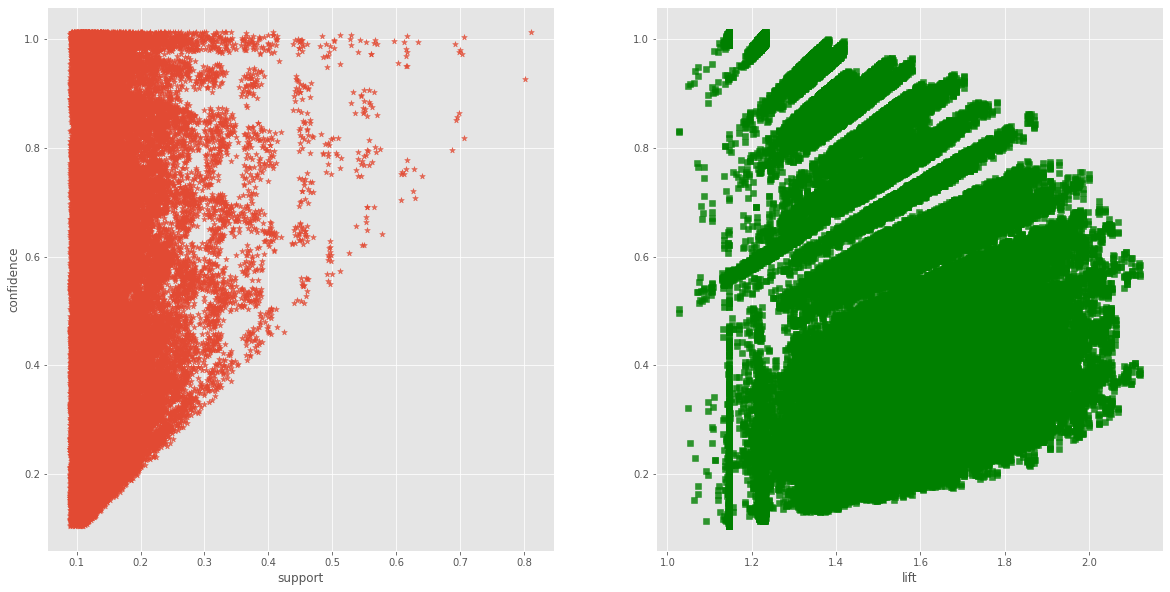

In [25]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

### Inference:
We see that the highest lift is 2.12 and we also have some perfect confidence scores of 1.

To select the most frequent association rules, we choose a high lift (>2) and a high confidence too (>0.65 which is close to the 75% mark)

In [26]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 2) &
        (rules['confidence'] >= 0.65)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98860,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(MISSED SERVICE, CART, RECYCLABLE ITEMS, GARBAGE)",0.156941,0.314111,0.102014,0.650012,2.069373,0.052717,1.959752
113605,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(RECYCLABLE ITEMS, CART, GARBAGE, MISSED SERVICE, NON_RECYCLABLE ITEMS)",0.156941,0.314111,0.102014,0.650012,2.069373,0.052717,1.959752
113542,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(MISSED SERVICE, CART, RECYCLABLE ITEMS, GARBAGE)",0.156941,0.314111,0.102014,0.650012,2.069373,0.052717,1.959752
113534,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE, RECYCLABLE ITEMS)","(NON_RECYCLABLE ITEMS, MISSED SERVICE, CART, GARBAGE)",0.156294,0.317841,0.102014,0.652703,2.053553,0.052337,1.964197
113481,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE, RECYCLABLE ITEMS, NON_RECYCLABLE ITEMS)","(MISSED SERVICE, CART, GARBAGE)",0.156294,0.317993,0.102014,0.652703,2.052570,0.052313,1.963759
98824,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE, RECYCLABLE ITEMS)","(MISSED SERVICE, CART, GARBAGE)",0.156294,0.317993,0.102014,0.652703,2.052570,0.052313,1.963759
97977,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(NON_RECYCLABLE ITEMS, MISSED SERVICE, CART, GARBAGE)",0.156941,0.317841,0.102356,0.652195,2.051954,0.052474,1.961326
66189,"(HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(MISSED SERVICE, CART, GARBAGE)",0.156941,0.317993,0.102356,0.652195,2.050971,0.052450,1.960888
97945,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION, RECYCLING, YARD WASTE)","(MISSED SERVICE, CART, GARBAGE)",0.156941,0.317993,0.102356,0.652195,2.050971,0.052450,1.960888
115416,"(NON_RECYCLABLE ITEMS, RECYCLING, VIOLATIONS)","(HNS HEALTH AND SANITATION, RECYCLABLE ITEMS, CART, GARBAGE, TRANSPORTATION)",0.154771,0.319135,0.101252,0.654206,2.049933,0.051859,1.968987


### Conclusion for running Association Rules on the entire dataset:
As stated earlier, we see that if HNS HEALTH AND SANITATION, RECYCLING or YARD WASTE requests are raised, chances of GARBAGE, MISSED SERVICE, CART or RECYCLABLE ITEMS are likely to also be raised in a particular neighborhood profile area during a monthly timeframe.

We also see a lot of association rules related to VIOLATIONS requests raised alond with some of the above mentioned types of requests

## Association Rules for different income levels

## High income levels

In [27]:
#create a matrix of merge index and category with the values as sum of high income requests(number of requests of 
# a particular category raised per month of a year for a particular neighborhood profile area) 
high_inc_basket = (requests[requests['PREDOMINANT_INCOME_BRACKET']=='High']
          .groupby(['MERGE_INDEX','REQUEST_CAT'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
high_inc_basket.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,CUSTOMER FEEDBACK,...,STW OTHER,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
high_inc_basket.shape

(1822, 32)

In [29]:
#update the values in the high_inc_basket_sets
high_inc_basket_sets = high_inc_basket.applymap(encode_units)
high_inc_basket_sets.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,CUSTOMER FEEDBACK,...,STW OTHER,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10_2016_142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10_2016_153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_178,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
#creating the frequest request sets. We use a minimum support of 0.005 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.005,1,high_inc_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(NON_RECYCLABLE ITEMS),(RECYCLABLE ITEMS),0.596597,0.172887,0.125686,0.210672,1.218551,0.022542,1.047869
1,(RECYCLABLE ITEMS),(NON_RECYCLABLE ITEMS),0.172887,0.596597,0.125686,0.726984,1.218551,0.022542,1.477580
2,(NON_RECYCLABLE ITEMS),(TIRES),0.596597,0.011526,0.010977,0.018399,1.596355,0.004101,1.007002
3,(TIRES),(NON_RECYCLABLE ITEMS),0.011526,0.596597,0.010977,0.952381,1.596355,0.004101,8.471460
4,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION)",(RECYCLABLE ITEMS),0.015917,0.172887,0.006586,0.413793,2.393432,0.003834,1.410958
5,"(HNS HEALTH AND SANITATION, RECYCLABLE ITEMS)",(NON_RECYCLABLE ITEMS),0.007684,0.596597,0.006586,0.857143,1.436720,0.002002,2.823820
6,(NON_RECYCLABLE ITEMS),"(HNS HEALTH AND SANITATION, RECYCLABLE ITEMS)",0.596597,0.007684,0.006586,0.011040,1.436720,0.002002,1.003393
7,(RECYCLABLE ITEMS),"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION)",0.172887,0.015917,0.006586,0.038095,2.393432,0.003834,1.023057


In [31]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.271336,0.271336,0.037459,0.403563,1.661264,0.008120,2.283142
std,0.277494,0.277494,0.054489,0.393672,0.474100,0.008943,2.573970
min,0.007684,0.007684,0.006586,0.011040,1.218551,0.002002,1.003393
25%,0.014819,0.014819,0.006586,0.033171,1.382178,0.003376,1.019043
50%,0.172887,0.172887,0.008782,0.312232,1.516537,0.003968,1.229413
75%,0.596597,0.596597,0.039654,0.759524,1.795624,0.008711,1.814140
max,0.596597,0.596597,0.125686,0.952381,2.393432,0.022542,8.471460


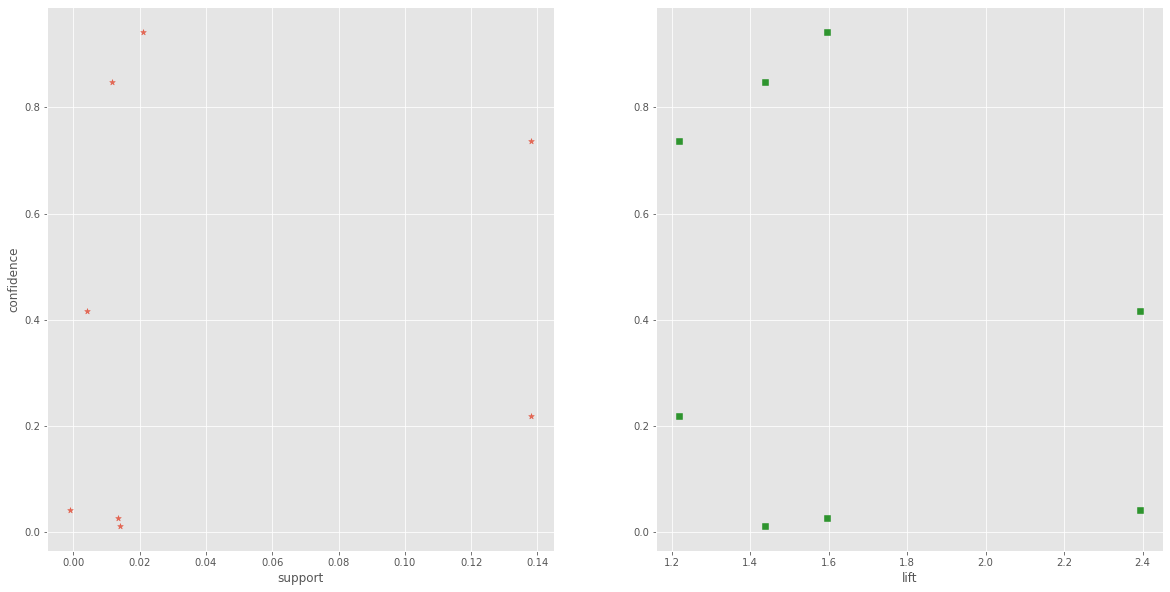

In [32]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

In [33]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 1.5) &
        (rules['confidence'] >= 0.3)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION)",(RECYCLABLE ITEMS),0.015917,0.172887,0.006586,0.413793,2.393432,0.003834,1.410958
3,(TIRES),(NON_RECYCLABLE ITEMS),0.011526,0.596597,0.010977,0.952381,1.596355,0.004101,8.471460


### Inference:
We see that the dataset for high income group has around 1800 records. To generate association rules, we keep a minimum support of 0.005.

The highest lift is 2.39 and confidence is 0.95

Since there were 8 association rules generated, to select the most frequent association rules, we choose a lift (>1.5 which is close to the 50% mark) and a confidence too (>0.3 which is close to the 50% mark)

### Conclusion for running Association Rules on the high income dataset:
Similar to assocition rules for the entire dataset, we see that if NON_RECYCLABLE ITEMS and HNS HEALTH AND SANITATION requests are raised, chances of RECYCLABLE ITEMS request are likely to also be raised. Also, requests on TIRES have chances of raising NON_RECYCLABLE ITEMS in a particular neighborhood profile area during a monthly timeframe.

## Mid income levels

In [34]:
#create a matrix of merge index and category with the values as sum of mid income requests(number of requests of 
# a particular category raised per month of a year for a particular neighborhood profile area) 
mid_inc_basket = (requests[requests['PREDOMINANT_INCOME_BRACKET']=='Mid']
          .groupby(['MERGE_INDEX','REQUEST_CAT'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
mid_inc_basket.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_10,3.0,2.0,0.0,0.0,0.0,0.0,2.0,18.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0
10_2016_100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
10_2016_101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10_2016_102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
10_2016_103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
10_2016_105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
mid_inc_basket.shape

(26072, 39)

In [36]:
#update the values in the mid_inc_basket_sets
mid_inc_basket_sets = mid_inc_basket.applymap(encode_units)
mid_inc_basket_sets.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_10,1,1,0,0,0,0,1,1,0,0,...,0,1,1,0,1,1,1,1,1,1
10_2016_100,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
10_2016_101,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
10_2016_102,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
10_2016_103,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10_2016_105,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10_2016_106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10_2016_107,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_108,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
#creating the frequest request sets. We use a minimum support of 0.1 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.1,1,mid_inc_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BULKY ITEM),(311 DOCUMENT),0.218855,0.480822,0.125882,0.575184,1.196251,0.020652,1.222124
1,(311 DOCUMENT),(BULKY ITEM),0.480822,0.218855,0.125882,0.261806,1.196251,0.020652,1.058183
2,(CART),(311 DOCUMENT),0.705278,0.480822,0.365986,0.518925,1.079246,0.026873,1.079204
3,(311 DOCUMENT),(CART),0.480822,0.705278,0.365986,0.761168,1.079246,0.026873,1.234014
4,(COMPLAINT),(311 DOCUMENT),0.250997,0.480822,0.143295,0.570905,1.187351,0.022610,1.209935
5,(311 DOCUMENT),(COMPLAINT),0.480822,0.250997,0.143295,0.298022,1.187351,0.022610,1.066988
6,(311 DOCUMENT),(CUSTOMER FEEDBACK),0.480822,0.204779,0.112956,0.234923,1.147204,0.014494,1.039400
7,(CUSTOMER FEEDBACK),(311 DOCUMENT),0.204779,0.480822,0.112956,0.551601,1.147204,0.014494,1.157849
8,(311 DOCUMENT),(DEAD ANIMAL COLLECTION),0.480822,0.263002,0.148780,0.309429,1.176525,0.022323,1.067229
9,(DEAD ANIMAL COLLECTION),(311 DOCUMENT),0.263002,0.480822,0.148780,0.565699,1.176525,0.022323,1.195434


In [38]:
rules.tail(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
109400,"(CART, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, GARBAGE...",0.682648,0.104288,0.102255,0.149792,1.436330,0.031063,1.053521
109401,"(GARBAGE, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, M...",0.480094,0.124386,0.102255,0.212990,1.712329,0.042538,1.112583
109402,"(MISSED SERVICE, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.492406,0.124923,0.102255,0.207665,1.662338,0.040742,1.104427
109403,"(311 DOCUMENT, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.398550,0.157180,0.102255,0.256568,1.632320,0.039611,1.133688
109404,"(TRANSPORTATION, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.608967,0.111499,0.102255,0.167916,1.505986,0.034356,1.067802
109405,"(NON_RECYCLABLE ITEMS, RECYCLABLE ITEMS)","(HNS HEALTH AND SANITATION, RECYCLING, CART, G...",0.801856,0.102600,0.102255,0.127523,1.242910,0.019984,1.028565
109406,"(CART, GARBAGE)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.449716,0.127263,0.102255,0.227377,1.786674,0.045023,1.129577
109407,"(MISSED SERVICE, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.450330,0.126956,0.102255,0.227068,1.788551,0.045083,1.129522
109408,"(CART, 311 DOCUMENT)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.365986,0.160709,0.102255,0.279396,1.738525,0.043438,1.164706
109409,"(TRANSPORTATION, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.555845,0.113071,0.102255,0.183964,1.626967,0.039405,1.086874


In [39]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,109430.000000,109430.000000,109430.000000,109430.000000,109430.000000,109430.000000,1.094300e+05
mean,0.334647,0.334647,0.134331,0.510306,1.563002,0.045610,inf
std,0.186045,0.186045,0.043548,0.246683,0.194869,0.012829,NaN
min,0.100031,0.100031,0.100031,0.115281,1.032828,0.008010,1.010858e+00
25%,0.186522,0.186522,0.107778,0.303690,1.420793,0.038495,1.160344e+00
50%,0.276005,0.276005,0.119899,0.464131,1.569577,0.045206,1.342379e+00
75%,0.449486,0.449486,0.144216,0.699922,1.697943,0.052044,1.874787e+00
max,0.867712,0.867712,0.801856,1.000000,2.156804,0.117762,inf


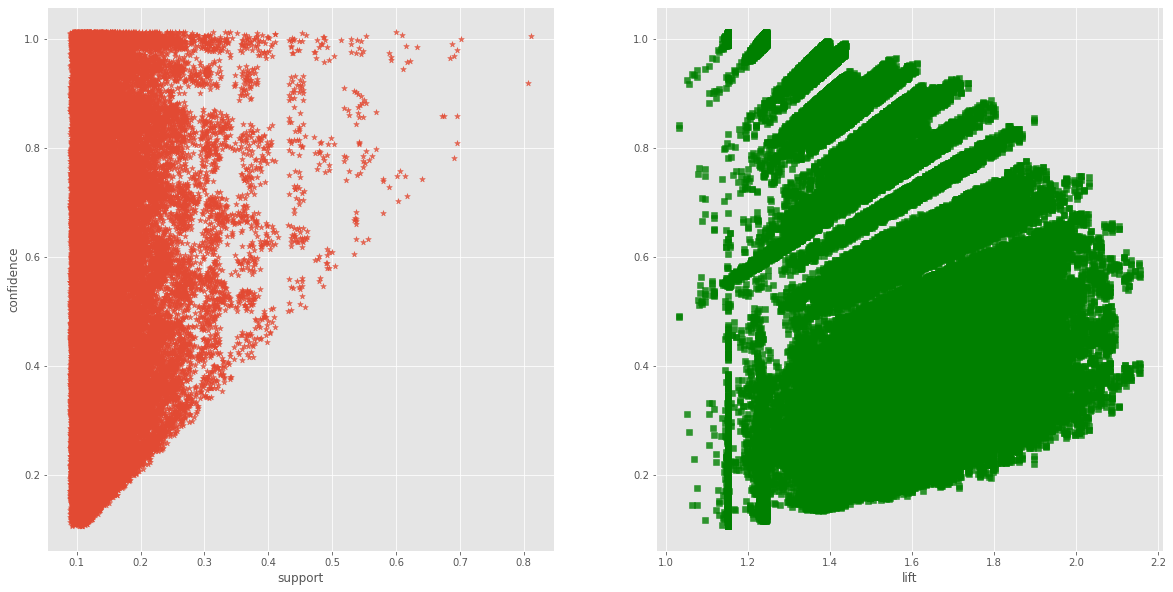

In [40]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

In [41]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 2) &
        (rules['confidence'] >= 0.7)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96593,"(GARBAGE, RECYCLING, YARD WASTE)","(TRANSPORTATION, MISSED SERVICE, CART, RECYCLABLE ITEMS)",0.141569,0.364567,0.104825,0.740450,2.031037,0.053213,2.448207
108271,"(NON_RECYCLABLE ITEMS, GARBAGE, RECYCLING, YARD WASTE)","(TRANSPORTATION, MISSED SERVICE, CART, RECYCLABLE ITEMS)",0.141569,0.364567,0.104825,0.740450,2.031037,0.053213,2.448207
108327,"(GARBAGE, RECYCLING, YARD WASTE)","(RECYCLABLE ITEMS, CART, MISSED SERVICE, TRANSPORTATION, NON_RECYCLABLE ITEMS)",0.141569,0.364567,0.104825,0.740450,2.031037,0.053213,2.448207
92575,"(GARBAGE, RECYCLING, YARD WASTE)","(MISSED SERVICE, HNS HEALTH AND SANITATION, CART, RECYCLABLE ITEMS)",0.141569,0.353099,0.100951,0.713086,2.019506,0.050963,2.254685
106267,"(NON_RECYCLABLE ITEMS, GARBAGE, RECYCLING, YARD WASTE)","(MISSED SERVICE, HNS HEALTH AND SANITATION, CART, RECYCLABLE ITEMS)",0.141569,0.353099,0.100951,0.713086,2.019506,0.050963,2.254685
106315,"(GARBAGE, RECYCLING, YARD WASTE)","(HNS HEALTH AND SANITATION, RECYCLABLE ITEMS, CART, MISSED SERVICE, NON_RECYCLABLE ITEMS)",0.141569,0.353099,0.100951,0.713086,2.019506,0.050963,2.254685
108251,"(GARBAGE, RECYCLING, YARD WASTE, RECYCLABLE ITEMS)","(TRANSPORTATION, NON_RECYCLABLE ITEMS, MISSED SERVICE, CART)",0.140726,0.370052,0.104825,0.744890,2.012931,0.052749,2.469315
96553,"(GARBAGE, RECYCLING, YARD WASTE, RECYCLABLE ITEMS)","(TRANSPORTATION, MISSED SERVICE, CART)",0.140726,0.370091,0.104825,0.744890,2.012723,0.052744,2.469164
108200,"(RECYCLING, YARD WASTE, RECYCLABLE ITEMS, GARBAGE, NON_RECYCLABLE ITEMS)","(TRANSPORTATION, MISSED SERVICE, CART)",0.140726,0.370091,0.104825,0.744890,2.012723,0.052744,2.469164
96462,"(GARBAGE, RECYCLING, YARD WASTE)","(TRANSPORTATION, NON_RECYCLABLE ITEMS, MISSED SERVICE, CART)",0.141569,0.370052,0.105247,0.743430,2.008987,0.052859,2.455267


### Inference:
We see a lot of similarities in the association rules generated by mid income group and the ones generated on the entire dataset. 

The highest lift is 2.15 and we also have some perfect confidence scores of 1.

To select the most frequent association rules, we choose a high lift (>2) and a high confidence too (>0.7 which is close to the 75% mark)

### Conclusion for running Association Rules on the mid income dataset:
We see that if GARBAGE, YARD WASTE, RECYCLING requests are raised, chances of MISSED SERVICE, RECYCLABLE ITEMS, CART, TRANSPORTATION are likely to also be raised in a particular neighborhood profile area during a monthly timeframe. We also see the above requests in combination with NON_RECYCLABLE ITEMS and RECYCLABLE ITEMS requests.

One difference we observe is, we don't see VIOLATIONS requests as part of the association rules for mid income group 

## Low income levels

In [42]:
#create a matrix of merge index and category with the values as sum of low income requests(number of requests of 
# a particular category raised per month of a year for a particular neighborhood profile area) 
low_inc_basket = (requests[requests['PREDOMINANT_INCOME_BRACKET']=='Low']
          .groupby(['MERGE_INDEX','REQUEST_CAT'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
low_inc_basket.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10_2016_125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10_2016_126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10_2016_153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10_2016_157,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10_2016_158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
low_inc_basket.shape

(1473, 38)

In [44]:
#update the values in the low_inc_basket
low_inc_basket_sets = low_inc_basket.applymap(encode_units)
low_inc_basket_sets.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10_2016_125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10_2016_126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_138,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
10_2016_153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10_2016_157,1,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,0,0
10_2016_158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_182,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0


In [45]:
#creating the frequest request sets. We use a minimum support of 0.1 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.1,1,low_inc_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CART),(311 DOCUMENT),0.319756,0.191446,0.152071,0.475584,2.484167,0.090855,1.541817
1,(311 DOCUMENT),(CART),0.191446,0.319756,0.152071,0.794326,2.484167,0.090855,3.307395
2,(GARBAGE),(311 DOCUMENT),0.222675,0.191446,0.112016,0.503049,2.627627,0.069386,1.627029
3,(311 DOCUMENT),(GARBAGE),0.191446,0.222675,0.112016,0.585106,2.627627,0.069386,1.873553
4,(HNS HEALTH AND SANITATION),(311 DOCUMENT),0.395112,0.191446,0.164291,0.415808,2.171931,0.088648,1.384054
5,(311 DOCUMENT),(HNS HEALTH AND SANITATION),0.191446,0.395112,0.164291,0.858156,2.171931,0.088648,4.264460
6,(MISSED SERVICE),(311 DOCUMENT),0.228106,0.191446,0.101154,0.443452,2.316331,0.057484,1.452803
7,(311 DOCUMENT),(MISSED SERVICE),0.191446,0.228106,0.101154,0.528369,2.316331,0.057484,1.636648
8,(NON_RECYCLABLE ITEMS),(311 DOCUMENT),0.702648,0.191446,0.180584,0.257005,1.342440,0.046065,1.088236
9,(311 DOCUMENT),(NON_RECYCLABLE ITEMS),0.191446,0.702648,0.180584,0.943262,1.342440,0.046065,5.240835


In [46]:
rules.tail(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2700,"(TRANSPORTATION, CART, RECYCLABLE ITEMS)","(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATI...",0.217923,0.143245,0.105227,0.482866,3.370908,0.074011,1.656737
2701,"(NON_RECYCLABLE ITEMS, CART, RECYCLABLE ITEMS)","(TRANSPORTATION, HNS HEALTH AND SANITATION, VI...",0.271555,0.122878,0.105227,0.387500,3.153522,0.071859,1.432035
2702,"(TRANSPORTATION, VIOLATIONS, RECYCLABLE ITEMS)","(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATI...",0.125594,0.254582,0.105227,0.837838,3.291027,0.073253,4.596741
2703,"(VIOLATIONS, NON_RECYCLABLE ITEMS, RECYCLABLE ...","(TRANSPORTATION, HNS HEALTH AND SANITATION, CART)",0.156823,0.209776,0.105227,0.670996,3.198630,0.072330,2.401865
2704,"(TRANSPORTATION, NON_RECYCLABLE ITEMS, RECYCLA...","(VIOLATIONS, HNS HEALTH AND SANITATION, CART)",0.272912,0.124915,0.105227,0.385572,3.086673,0.071137,1.424227
2705,"(TRANSPORTATION, CART, VIOLATIONS)","(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATI...",0.112695,0.320434,0.105227,0.933735,2.913965,0.069116,10.255261
2706,"(NON_RECYCLABLE ITEMS, CART, VIOLATIONS)","(TRANSPORTATION, HNS HEALTH AND SANITATION, RE...",0.133062,0.246436,0.105227,0.790816,3.209015,0.072436,3.602404
2707,"(TRANSPORTATION, NON_RECYCLABLE ITEMS, CART)","(VIOLATIONS, HNS HEALTH AND SANITATION, RECYCL...",0.223354,0.139172,0.105227,0.471125,3.385203,0.074143,1.627658
2708,"(TRANSPORTATION, NON_RECYCLABLE ITEMS, VIOLATI...","(HNS HEALTH AND SANITATION, CART, RECYCLABLE I...",0.129667,0.247794,0.105227,0.811518,3.274977,0.073097,3.990873
2709,"(HNS HEALTH AND SANITATION, RECYCLABLE ITEMS)","(TRANSPORTATION, NON_RECYCLABLE ITEMS, CART, V...",0.321792,0.112695,0.105227,0.327004,2.901670,0.068963,1.318440


In [47]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,0.256817,0.256817,0.132261,0.623227,2.557275,0.076528,inf
std,0.140251,0.140251,0.035306,0.245443,0.522581,0.020556,NaN
min,0.100475,0.100475,0.100475,0.142995,1.192534,0.022721,1.037732
25%,0.152071,0.152071,0.109301,0.419980,2.259742,0.067692,1.452210
50%,0.222675,0.222675,0.122200,0.611729,2.661287,0.074980,1.983586
75%,0.319756,0.319756,0.139172,0.846927,2.977253,0.085913,4.380907
max,0.702648,0.702648,0.433809,1.000000,3.433828,0.161976,inf


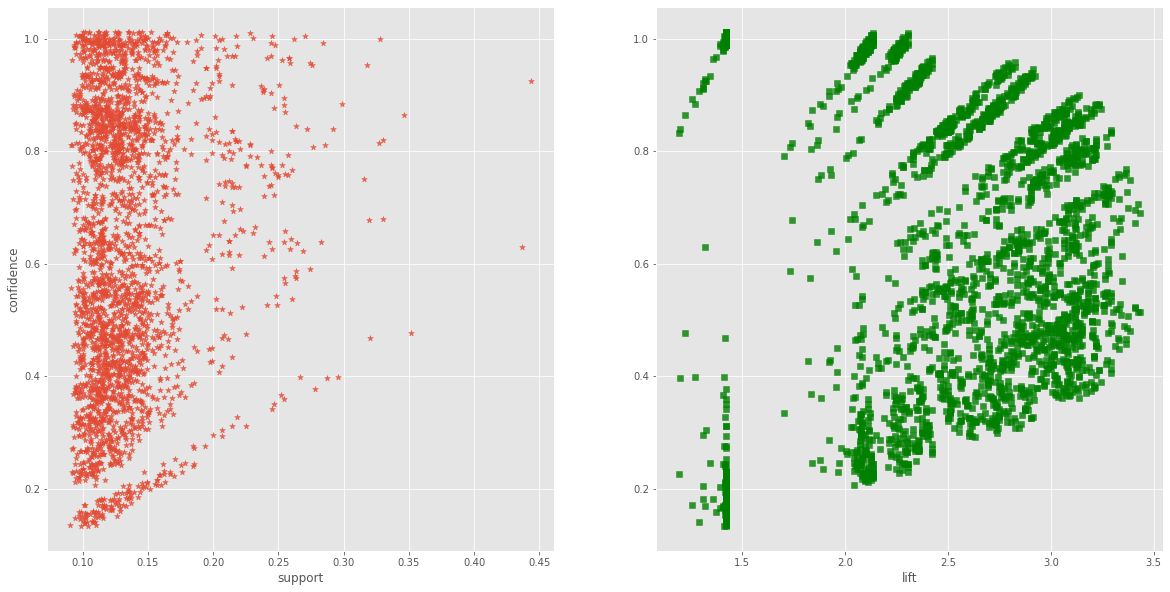

In [48]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

In [49]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 3.1) &
        (rules['confidence'] >= 0.85)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2437,"(HNS HEALTH AND SANITATION, RECYCLING)","(TRANSPORTATION, NON_RECYCLABLE ITEMS, RECYCLABLE ITEMS)",0.123557,0.272912,0.109301,0.884615,3.241389,0.075580,6.301426
1565,"(HNS HEALTH AND SANITATION, RECYCLING)","(TRANSPORTATION, RECYCLABLE ITEMS)",0.123557,0.273591,0.109301,0.884615,3.233346,0.075497,6.295542
2429,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION, RECYCLING)","(TRANSPORTATION, RECYCLABLE ITEMS)",0.123557,0.273591,0.109301,0.884615,3.233346,0.075497,6.295542
2077,"(HNS HEALTH AND SANITATION, RECYCLING)","(NON_RECYCLABLE ITEMS, CART, RECYCLABLE ITEMS)",0.123557,0.271555,0.107943,0.873626,3.217129,0.074390,5.764220
2258,"(CART, RECYCLING)","(TRANSPORTATION, NON_RECYCLABLE ITEMS, RECYCLABLE ITEMS)",0.116768,0.272912,0.102512,0.877907,3.216808,0.070644,5.955193
2251,"(NON_RECYCLABLE ITEMS, CART, RECYCLING)","(TRANSPORTATION, RECYCLABLE ITEMS)",0.116768,0.273591,0.102512,0.877907,3.208826,0.070565,5.949633
1271,"(CART, RECYCLING)","(TRANSPORTATION, RECYCLABLE ITEMS)",0.116768,0.273591,0.102512,0.877907,3.208826,0.070565,5.949633
2259,"(TRANSPORTATION, RECYCLING)","(NON_RECYCLABLE ITEMS, CART, RECYCLABLE ITEMS)",0.118126,0.271555,0.102512,0.867816,3.195733,0.070434,5.510847
2069,"(NON_RECYCLABLE ITEMS, HNS HEALTH AND SANITATION, RECYCLING)","(CART, RECYCLABLE ITEMS)",0.123557,0.273591,0.107943,0.873626,3.193180,0.074139,5.748104
1075,"(HNS HEALTH AND SANITATION, RECYCLING)","(CART, RECYCLABLE ITEMS)",0.123557,0.273591,0.107943,0.873626,3.193180,0.074139,5.748104


### Inference:
Again, we see a lot of similarities in the association rules generated by low income group, mid income group and the ones generated on the entire dataset even though the count of low income basket records is around 1450. 

The highest lift is 3.43 and we also have some perfect confidence scores of 1.

To select the most frequent association rules, we choose a high lift (>3.1) and a high confidence too (>0.85 which is close to the 75% mark)

### Conclusion for running Association Rules on the low income dataset:
We see that if HNS HEALTH AND SANITATION, RECYCLING requests are raised, chances of RECYCLABLE ITEMS, NON_RECYCLABLE ITEMS, TRANSPORTATION are likely to also be raised in a particular neighborhood profile area during a monthly timeframe. We also see the above requests in combination with CART, GARBAGE and MISSED SERVICE requests. 

We observe that association rules for low income group have some combinations of VIOLATIONS requests.

## Association Rules for mid & high crime index areas

In [50]:
#create a matrix of merge index and category with the values as sum of mid & high crime index requests(number of requests of 
# a particular category raised per month of a year for a particular neighborhood profile area) 
high_crime_basket = (requests[requests['CRIME_INDEX']!='Low']
          .groupby(['MERGE_INDEX','REQUEST_CAT'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
high_crime_basket.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_124,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0
10_2016_164,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,2.0,0.0,...,0.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
10_2016_219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
10_2016_290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
10_2016_3,6.0,2.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,3.0,...,0.0,1.0,15.0,0.0,3.0,4.0,4.0,4.0,3.0,10.0
10_2016_331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
10_2016_341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0
10_2016_342,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10_2016_358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,10.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0


In [51]:
high_crime_basket.shape

(1016, 39)

In [52]:
#update the values in the high_crime_basket
high_crime_basket_sets = high_crime_basket.applymap(encode_units)
high_crime_basket_sets.head(20)

REQUEST_CAT,311 DOCUMENT,ADMINISTRATIVE ACTIONS,ADOPT-A PICKUP SWS,ANIMAL FOUND REPORT,BLOCKAGE,BOARDED UP STRUCTURE,BULKY ITEM,CART,CLEANLINESS,COMPLAINT,...,SW ONLY-DOOR HANGER LEFT,TIRES,TRANSPORTATION,UTILITY VERIFICATION LTR,VIOLATIONS,WEATHER AND ENVIRONMENTAL,YARD WASTE,ZON GENERAL INFO INQUIRY,ZONING,ZONING/COMPLAINT/ INSPECT
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_124,1,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,1
10_2016_164,1,0,0,0,1,0,1,1,1,0,...,0,1,1,0,1,1,0,0,0,1
10_2016_219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10_2016_290,0,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,1
10_2016_3,1,1,0,0,0,0,1,1,0,1,...,0,1,1,0,1,1,1,1,1,1
10_2016_331,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10_2016_341,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,1,1,1
10_2016_342,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10_2016_358,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,1,1,1,0,1,1


In [53]:
#creating the frequest request sets. We use a minimum support of 0.2 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.2,1,high_crime_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BULKY ITEM),(311 DOCUMENT),0.353346,0.633858,0.274606,0.777159,1.226077,0.050635,1.643061
1,(311 DOCUMENT),(BULKY ITEM),0.633858,0.353346,0.274606,0.433230,1.226077,0.050635,1.140945
2,(CART),(311 DOCUMENT),0.793307,0.633858,0.546260,0.688586,1.086340,0.043416,1.175738
3,(311 DOCUMENT),(CART),0.633858,0.793307,0.546260,0.861801,1.086340,0.043416,1.495621
4,(COMPLAINT),(311 DOCUMENT),0.411417,0.633858,0.307087,0.746411,1.177568,0.046306,1.443842
5,(311 DOCUMENT),(COMPLAINT),0.633858,0.411417,0.307087,0.484472,1.177568,0.046306,1.141709
6,(311 DOCUMENT),(CUSTOMER FEEDBACK),0.633858,0.341535,0.246063,0.388199,1.136628,0.029578,1.076272
7,(CUSTOMER FEEDBACK),(311 DOCUMENT),0.341535,0.633858,0.246063,0.720461,1.136628,0.029578,1.309806
8,(311 DOCUMENT),(DEAD ANIMAL COLLECTION),0.633858,0.418307,0.320866,0.506211,1.210142,0.055719,1.178020
9,(DEAD ANIMAL COLLECTION),(311 DOCUMENT),0.418307,0.633858,0.320866,0.767059,1.210142,0.055719,1.571821


In [54]:
rules.tail(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
664782,"(MISSED SERVICE, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.610236,0.215551,0.209646,0.343548,1.593814,0.078109,1.194983
664783,"(CART, 311 DOCUMENT)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.546260,0.251969,0.209646,0.383784,1.523142,0.072005,1.213911
664784,"(CART, ZONING)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.442913,0.292323,0.209646,0.473333,1.619214,0.080172,1.343691
664785,"(TRANSPORTATION, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.729331,0.214567,0.209646,0.287449,1.339672,0.053155,1.102284
664786,"(NON_RECYCLABLE ITEMS, CART)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.792323,0.209646,0.209646,0.264596,1.262112,0.043539,1.074722
664787,"(MISSED SERVICE, GARBAGE)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.519685,0.235236,0.209646,0.403409,1.714911,0.087397,1.281890
664788,"(GARBAGE, 311 DOCUMENT)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.464567,0.275591,0.209646,0.451271,1.637470,0.081615,1.320159
664789,"(GARBAGE, ZONING)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.376969,0.317913,0.209646,0.556136,1.749331,0.089802,1.536701
664790,"(TRANSPORTATION, GARBAGE)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.608268,0.232283,0.209646,0.344660,1.483791,0.068355,1.171479
664791,"(NON_RECYCLABLE ITEMS, GARBAGE)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLA...",0.643701,0.225394,0.209646,0.325688,1.444974,0.064560,1.148736


In [55]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,664812.000000,664812.000000,664812.000000,664812.000000,664812.000000,664812.000000,6.648120e+05
mean,0.441016,0.441016,0.238350,0.613390,1.417250,0.065668,inf
std,0.178613,0.178613,0.042960,0.210542,0.184186,0.020840,NaN
min,0.200787,0.200787,0.200787,0.206269,1.011051,0.002723,1.003570e+00
25%,0.305118,0.305118,0.210630,0.449225,1.287295,0.053901,1.238686e+00
50%,0.395669,0.395669,0.224409,0.594480,1.416033,0.068789,1.481747e+00
75%,0.538386,0.538386,0.250984,0.777397,1.546434,0.081023,2.098485e+00
max,0.973425,0.973425,0.924213,1.000000,2.028155,0.127503,inf


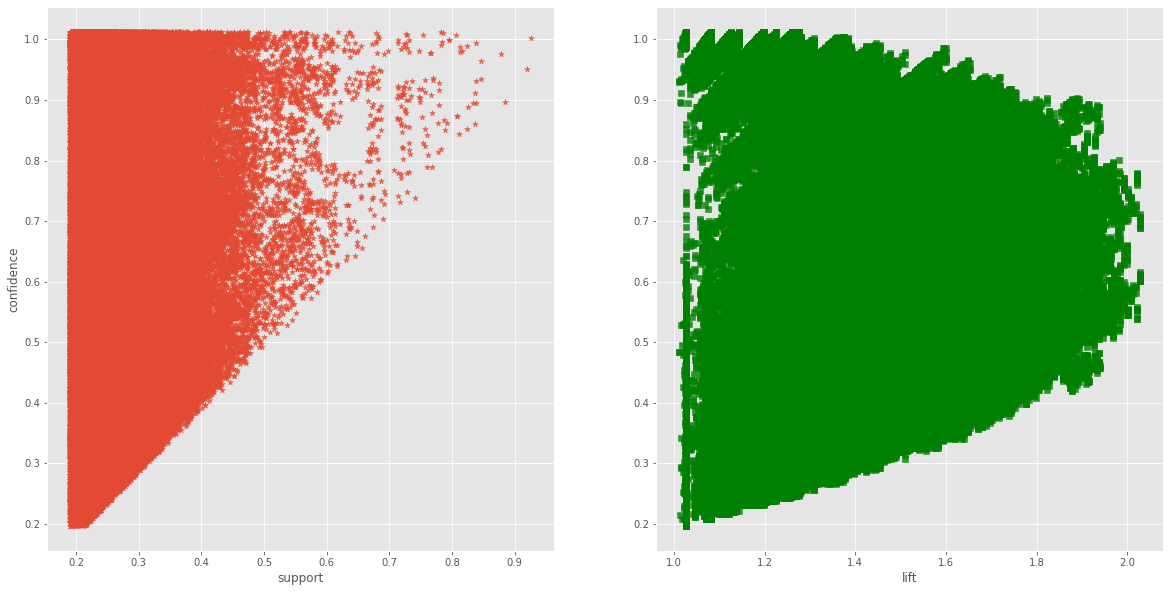

In [56]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

In [57]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 2) &
        (rules['confidence'] >= 0.77)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
506055,"(TRANSPORTATION, MISSED SERVICE, 311 DOCUMENT, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
626300,"(MISSED SERVICE, 311 DOCUMENT, TRANSPORTATION, NON_RECYCLABLE ITEMS, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
626423,"(TRANSPORTATION, MISSED SERVICE, 311 DOCUMENT, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE, NON_RECYCLABLE ITEMS)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
626804,"(RECYCLABLE ITEMS, MISSED SERVICE, 311 DOCUMENT, TRANSPORTATION, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
626936,"(TRANSPORTATION, MISSED SERVICE, 311 DOCUMENT, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLABLE ITEMS, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
662123,"(RECYCLABLE ITEMS, MISSED SERVICE, 311 DOCUMENT, TRANSPORTATION, NON_RECYCLABLE ITEMS, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
662358,"(RECYCLABLE ITEMS, MISSED SERVICE, 311 DOCUMENT, TRANSPORTATION, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, CART, GARBAGE, NON_RECYCLABLE ITEMS)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
662382,"(MISSED SERVICE, 311 DOCUMENT, TRANSPORTATION, NON_RECYCLABLE ITEMS, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLABLE ITEMS, CART, GARBAGE)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257
662589,"(TRANSPORTATION, MISSED SERVICE, 311 DOCUMENT, DEAD ANIMAL COLLECTION)","(HNS HEALTH AND SANITATION, RECYCLING, RECYCLABLE ITEMS, CART, GARBAGE, NON_RECYCLABLE ITEMS)",0.269685,0.380906,0.207677,0.770073,2.02169,0.104953,2.69257


### Inference:
We see some distinct association rules generated by mid and high crime index areas and the ones generated on the entire dataset. 

The highest lift is 2 and we also have some perfect confidence scores of 1.

To select the most frequent association rules, we choose a high lift (>2) and a high confidence too (>0.77 which is close to the 75% mark)

### Conclusion for running Association Rules on the mid & high crime index areas dataset:
We see DEAD ANIMAL COLLECTION, 311 DOCUMENT, TRANSPORTATION and MISSED SERVICE to be a common antecedent such that if any of them are raised, chances of RECYCLABLE ITEMS, NON_RECYCLABLE ITEMS, GARBAGE, CART, RECYCLING, HNS HEALTH AND SANITATION are likely to also be raised in a particular neighborhood profile area during a monthly timeframe. 

In contrast to low income datasets, we do not see VIOLATIONS requests in combinations of association rules, which makes us question if Crime and Violation requests are related to the crime index or low income areas.

## Association Rules for different Neighborhood Profile areas grouped by Request Categories

In [58]:
#updating the merge index to be a combination of month, year and request category type 
requests['MERGE_INDEX']=requests['RECEIVED_MONTH'].astype('str')+'_'+requests['RECEIVED_YEAR'].astype('str')+'_'+requests['REQUEST_CAT'].astype('str')

In [59]:
#create a matrix of merge index and category with the values as sum of requests(number of requests 
# in a particular neighborhood profile area raised per month of a year for a particular neighborhood profile area) 
# we exclude NPA = -1 as these requests do not have any neighborhood profile area associated to them
npa_request_basket = (requests[requests['NEIGHBORHOOD_PROFILE_AREA']!="-1"] 
          .groupby(['MERGE_INDEX','NEIGHBORHOOD_PROFILE_AREA'])['REQ_COUNT']
          .sum().unstack().reset_index().fillna(0)
          .set_index('MERGE_INDEX'))
npa_request_basket.head(20)

NEIGHBORHOOD_PROFILE_AREA,10,100,101,102,103,105,106,107,108,109,...,90,91,92,93,94,95,96,97,98,99
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_311 DOCUMENT,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
10_2016_ADMINISTRATIVE ACTIONS,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_ANIMAL FOUND REPORT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_BLOCKAGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
10_2016_BOARDED UP STRUCTURE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_BULKY ITEM,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10_2016_CART,18.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,5.0,3.0,1.0,5.0,10.0,0.0
10_2016_CLEANLINESS,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_2016_COMPLAINT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
npa_request_basket.shape

(2155, 462)

In [61]:
#update the values in the high_crime_basket
npa_request_basket_sets = npa_request_basket.applymap(encode_units)
npa_request_basket_sets.head(20)

NEIGHBORHOOD_PROFILE_AREA,10,100,101,102,103,105,106,107,108,109,...,90,91,92,93,94,95,96,97,98,99
MERGE_INDEX,,,,,,,,,,,,,,,,,,,,,
10_2016_311 DOCUMENT,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,1
10_2016_ADMINISTRATIVE ACTIONS,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_ANIMAL FOUND REPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_BLOCKAGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10_2016_BOARDED UP STRUCTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2016_BULKY ITEM,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10_2016_CART,1,1,1,1,1,0,0,0,1,1,...,0,1,0,0,1,1,1,1,1,0
10_2016_CLEANLINESS,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10_2016_COMPLAINT,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [62]:
#creating the frequest request sets. We use a minimum support of 0.5 to create 
# more number of frequent lists than seen above
rules=create_assoc_rules("lift",0.3,1,npa_request_basket_sets)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(100),(10),0.397216,0.522042,0.322042,0.810748,1.553032,0.114679,2.525508
1,(10),(100),0.522042,0.397216,0.322042,0.616889,1.553032,0.114679,1.573393
2,(11),(10),0.393503,0.522042,0.306729,0.779481,1.493139,0.101303,2.167426
3,(10),(11),0.522042,0.393503,0.306729,0.587556,1.493139,0.101303,1.470493
4,(113),(10),0.484455,0.522042,0.362413,0.748084,1.432997,0.109507,1.897294
5,(10),(113),0.522042,0.484455,0.362413,0.694222,1.432997,0.109507,1.686013
6,(117),(10),0.433875,0.522042,0.337819,0.778610,1.491470,0.111318,2.158893
7,(10),(117),0.522042,0.433875,0.337819,0.647111,1.491470,0.111318,1.604259
8,(121),(10),0.374942,0.522042,0.305336,0.814356,1.559945,0.109601,2.574602
9,(10),(121),0.522042,0.374942,0.305336,0.584889,1.559945,0.109601,1.505761


In [63]:
rules.tail(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37192,"(392, 389, 393, 385)",(371),0.322506,0.632947,0.307657,0.953957,1.507168,0.103528,7.971940
37193,"(392, 389, 393, 371)",(385),0.338283,0.565661,0.307657,0.909465,1.607791,0.116303,4.797469
37194,"(392, 389, 371, 385)",(393),0.345708,0.528538,0.307657,0.889933,1.683762,0.124937,4.283402
37195,"(392, 371, 393, 385)",(389),0.347100,0.552204,0.307657,0.886364,1.605138,0.115987,3.940603
37196,"(389, 371, 393, 385)",(392),0.339211,0.562413,0.307657,0.906977,1.612653,0.116880,4.704060
37197,"(392, 389, 393)","(371, 385)",0.357773,0.491415,0.307657,0.859922,1.749889,0.131842,3.630730
37198,"(392, 389, 385)","(393, 371)",0.368445,0.458469,0.307657,0.835013,1.821308,0.138736,3.282259
37199,"(392, 389, 371)","(393, 385)",0.389327,0.419490,0.307657,0.790226,1.883781,0.144338,2.767320
37200,"(392, 393, 385)","(389, 371)",0.373086,0.476566,0.307657,0.824627,1.730351,0.129857,2.984687
37201,"(392, 393, 371)","(389, 385)",0.397216,0.444084,0.307657,0.774533,1.744115,0.131260,2.465619


In [64]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000,37222.000000
mean,0.447234,0.447234,0.315899,0.728123,1.633213,0.121445,2.538675
std,0.082496,0.082496,0.017425,0.124619,0.100596,0.010446,1.327171
min,0.310441,0.310441,0.300232,0.474340,1.342283,0.087292,1.262362
25%,0.379118,0.379118,0.303944,0.623923,1.564568,0.114608,1.643163
50%,0.434803,0.434803,0.310441,0.732143,1.627717,0.121657,2.108755
75%,0.509977,0.509977,0.321578,0.831976,1.699225,0.128570,2.941411
max,0.632947,0.632947,0.491415,0.970803,1.960364,0.158161,12.571578


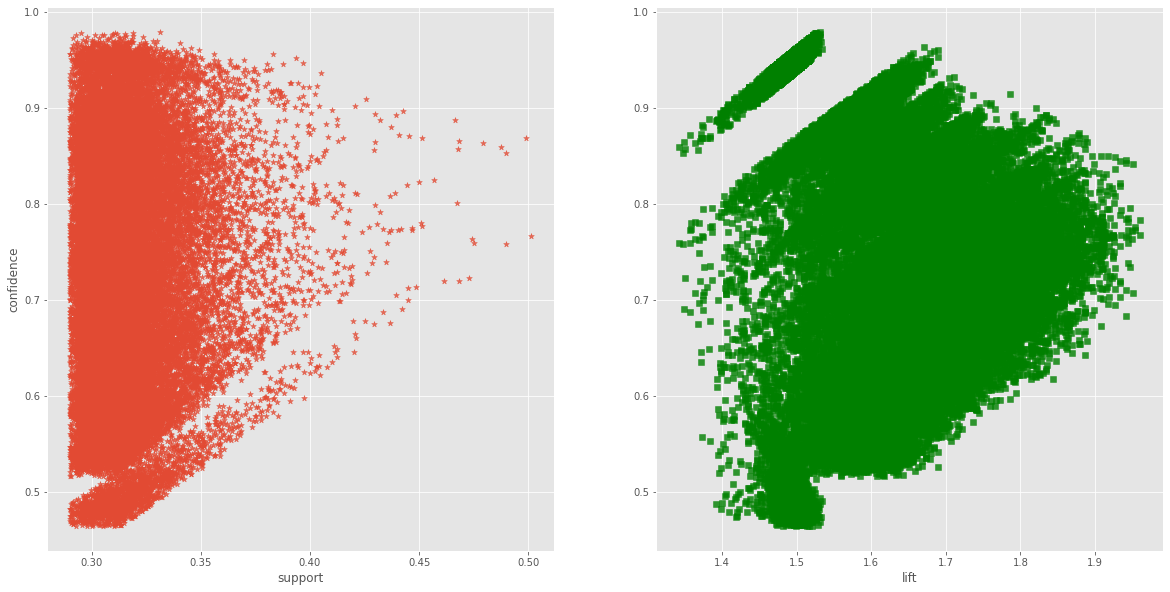

In [65]:
#plot association rules
plot_assoc_rules(rules[['support']].values,rules[['confidence']].values,rules[['lift']].values)

### Inference:
We see the neighborhood profile areas 389, 393, 371, 385 and 392 occur in combinations in a lot of association rulessome.

We also observe the highest lift is 1.9 and highest confidence scores of 0.97.

To select the most frequent association rules, we choose a high lift (>1.9) and a high confidence too (>0.8 which is close to the 75% mark)

In [66]:
#fetch the most reliable association rules
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', None):
    display(rules[ (rules['lift'] >= 1.9) &
        (rules['confidence'] >= 0.8)].sort_values(['lift'],ascending=False) )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36361,"(3, 367, 371)","(392, 378)",0.356381,0.436659,0.303480,0.851562,1.950178,0.147864,3.795140
31811,"(377, 3)","(392, 378)",0.356845,0.436659,0.302552,0.847854,1.941686,0.146733,3.702643
36276,"(378, 348, 371)","(3, 393)",0.361949,0.427378,0.300232,0.829487,1.940874,0.145543,3.358233
36963,"(3, 393, 385)","(392, 378)",0.361021,0.436659,0.304872,0.844473,1.933942,0.147229,3.622143
37049,"(392, 372, 371)","(393, 385)",0.371230,0.419490,0.301160,0.811250,1.933898,0.145433,3.075552
36936,"(378, 3, 385)","(392, 389)",0.369838,0.425058,0.303944,0.821832,1.933458,0.146742,3.226963
31997,"(3, 388)","(392, 378)",0.362877,0.436659,0.305336,0.841432,1.926978,0.146883,3.552683
36927,"(392, 3, 389)","(378, 385)",0.374014,0.421810,0.303944,0.812655,1.926592,0.146182,3.086234
36962,"(392, 378, 385)","(3, 393)",0.370302,0.427378,0.304872,0.823308,1.926416,0.146614,3.240796
36194,"(378, 260)","(392, 3, 371)",0.381439,0.415777,0.305336,0.800487,1.925278,0.146743,2.928238


### Inference:
The above association rules show that certain request types tend to occur together during the same month in the neighborhood profile areas 3, 371, 378, 392, 393, 385. By plotting these on the map with the category types, we can check to see how close these areas are.

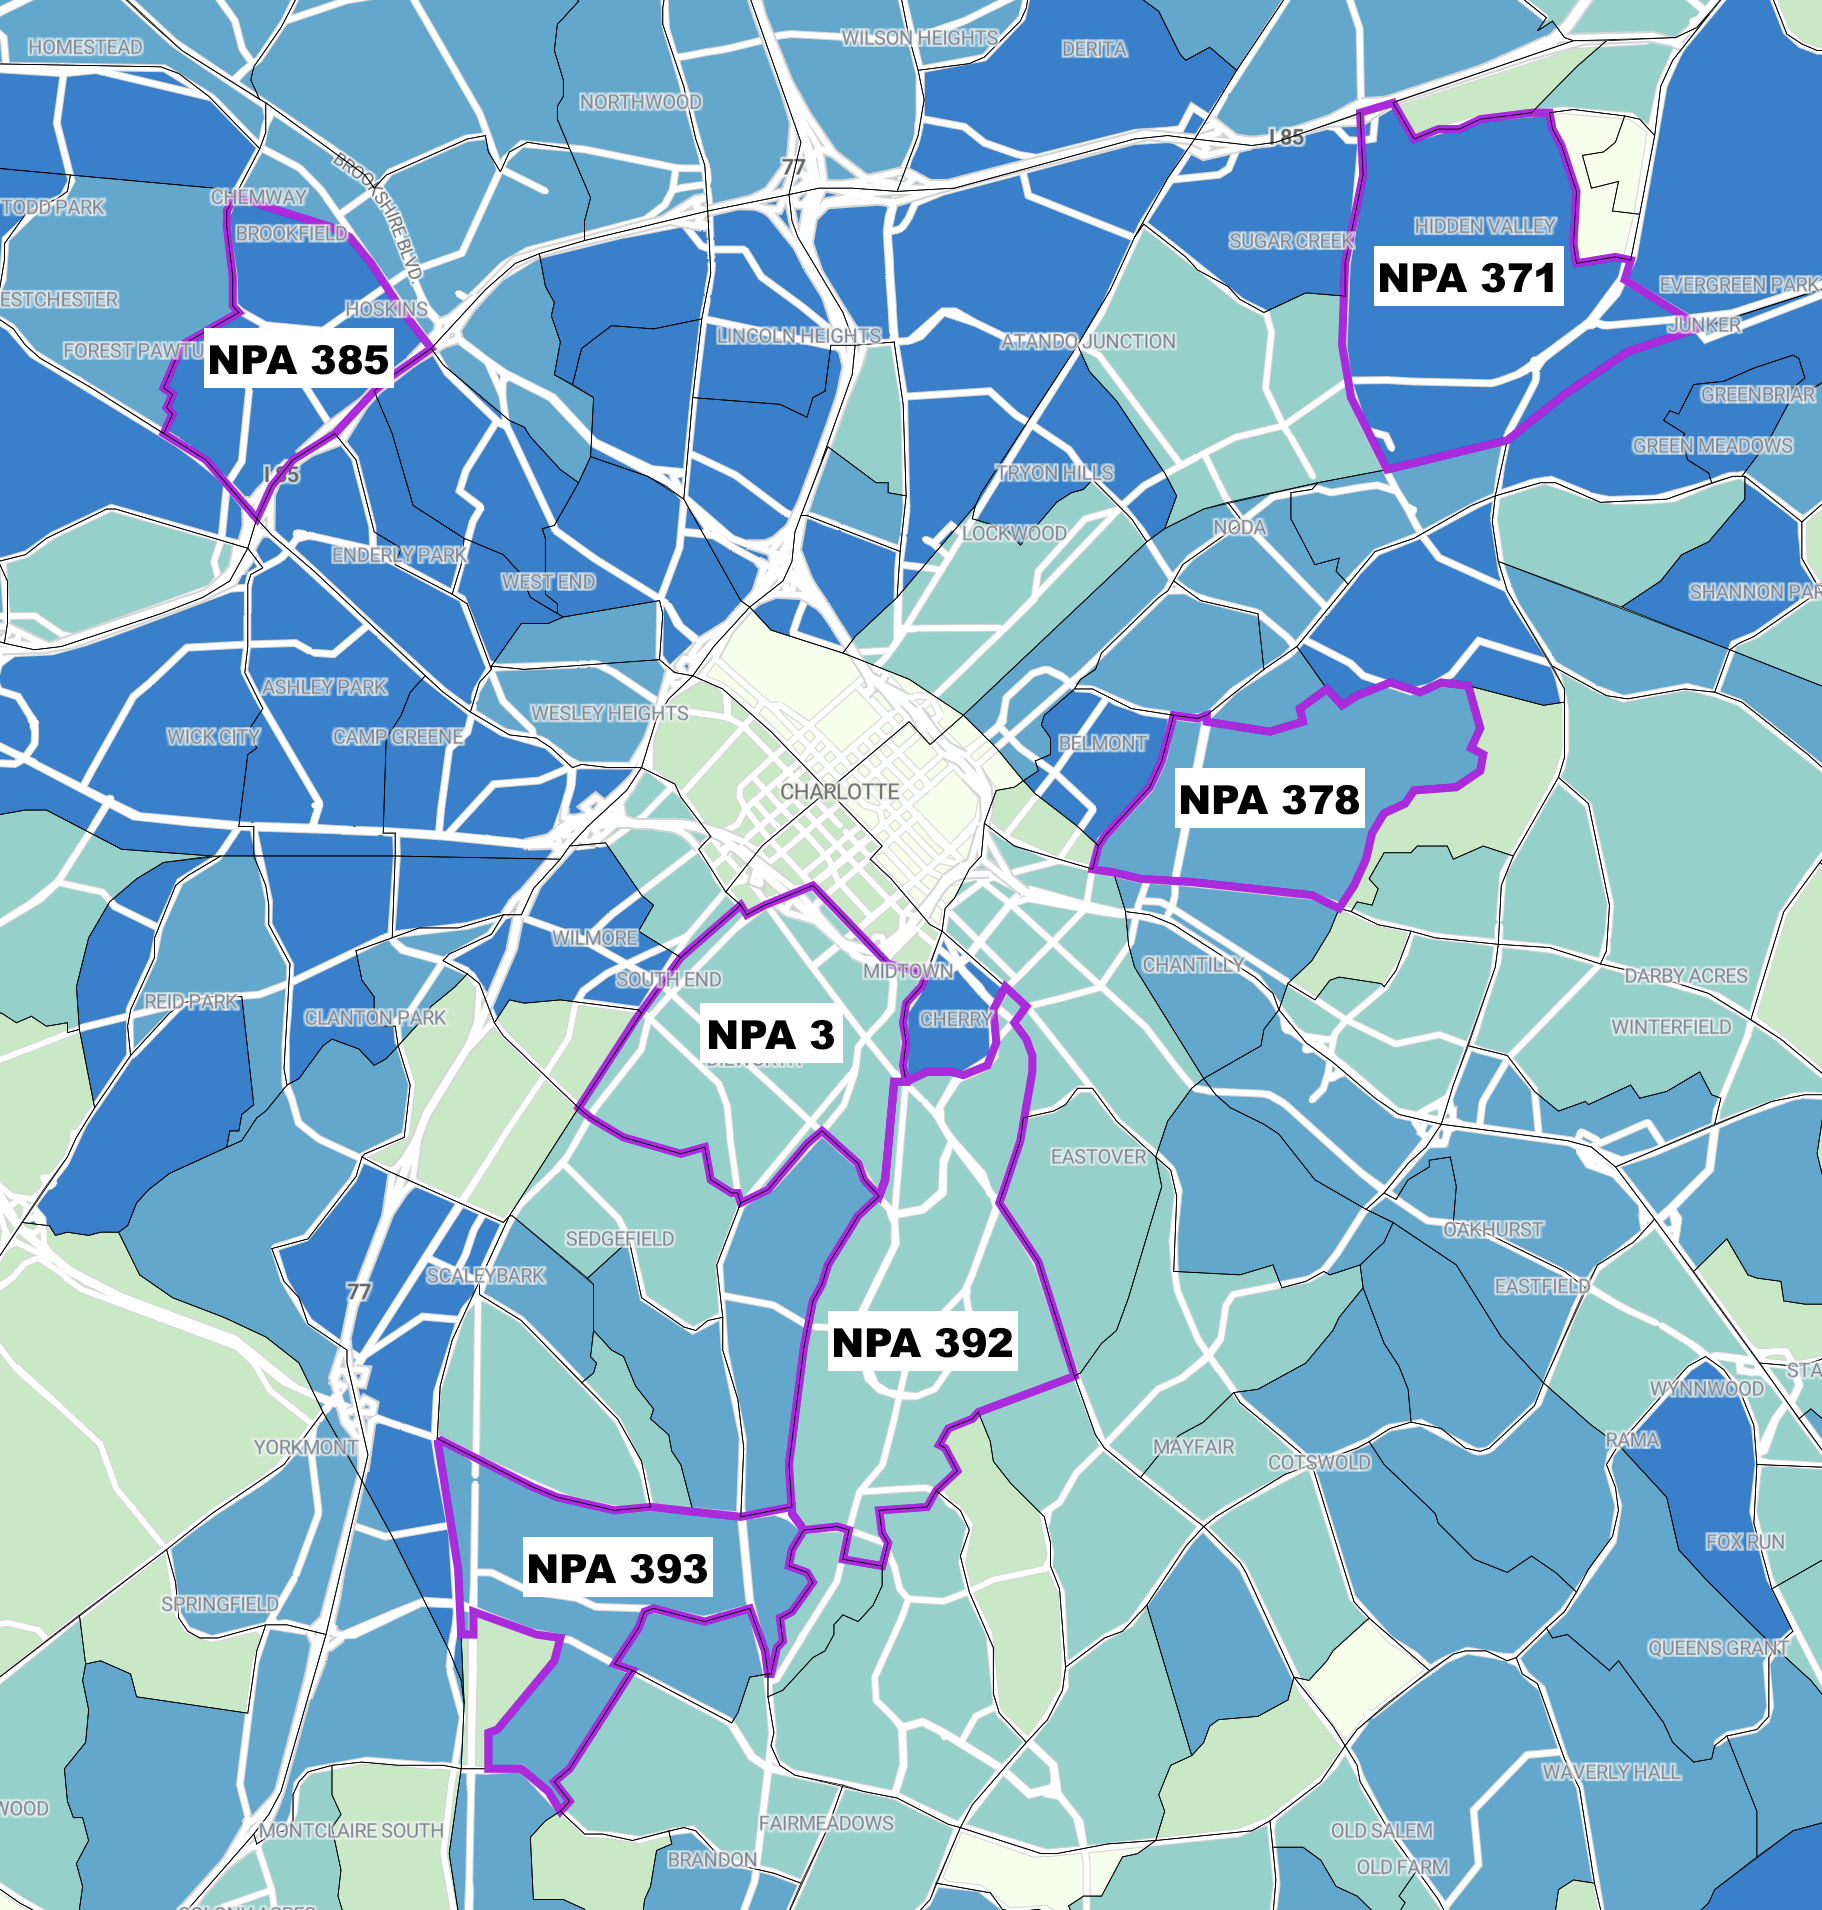

### Conclusion for Association Rules 
We see that there are associations between what kind of requests are raised in different income groups, crime indexes and Neighborhood profile areas. Though NON_RECYCLABLE ITEMS and RECYCLABLE ITEMS are the largest types of requests being raised, we do see other requests like CART, TRANSPORTATION, HNS HEALTH AND SANITATION, MISSED SERVICE, GARBAGE, RECYCLING, VIOLATIONS, DEAD ANIMAL COLLECTION are also seen in some scenarios. Understanding the causality of each of these associations depends on the domain knowledge which we hope to get sometime in the future.